In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\AI Sales Cross Selling and UpSelling.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,prefered_category,training_ID,training_type,training_name,trainer_name,training_total_meetings,training_price,discount_training,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,4,...,Credit & Collection Series,B0001,Credit & Collection Series,Managing Corporate Collection,Aryo,17,7000000,50,Mengelola NPL dengan Early Warning Sysstem (EWS),Managing Corporate Collection
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,HR Series,B0002,HR Series,Build A Great and Strong Corporate Culture,Reza,17,8000000,45,People (HR) Analytics: For HR & Non HR Profess...,Build A Great and Strong Corporate Culture
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,1,...,Other Series,B0003,Other Series,Information Security Awareness,Iqbal,8,6000000,0,Health And Safety Environment,Information Security Awareness
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,4,...,Sales & Marketing Series,B0004,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Rian,17,6000000,55,Professional Selling Skills,Sales Forecasting: for Sales Target Results
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,3,...,Training Series,B0005,Training Series,Train The Trainer For Outbond (Indoor-outdoor)...,Haris,14,7000000,20,Comprehensive Train The Trainers,Train The Trainer For Outbond (Indoor-outdoor)...


In [3]:
df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_ID", "discount_training", "training_price", "total_payment", "brand_sustainability", 
    "prefered_category", "upselling"
], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   company_field                                5000 non-null   object
 1   level_training_process                       5000 non-null   int64 
 2   purchasing_time_patterns                     5000 non-null   object
 3   number_of_participants                       5000 non-null   int64 
 4   group                                        5000 non-null   object
 5   satisfaction                                 5000 non-null   int64 
 6   communication_channel                        5000 non-null   object
 7   complaints                                   5000 non-null   object
 8   communication_quality                        5000 non-null   object
 9   possibility_of_purchasing_the_same_training  5000 non-null   int64 
 10  frequency_en

In [4]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = MinMaxScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,number_of_participants,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,interest_in_discount_program,training_total_meetings,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,training_type,training_name,trainer_name,cross_selling
0,0.75,0.736842,1.00,0.857143,0.750000,1.00,1.00,1.000000,4,1,0,2,2,0,1,0,9,1,16
1,1.00,0.684211,1.00,1.000000,0.625000,1.00,1.00,1.000000,1,1,0,2,2,0,1,2,1,6,17
2,0.00,0.000000,0.25,0.071429,0.041667,0.25,0.25,0.181818,14,2,1,0,0,1,0,5,6,4,9
3,0.75,0.789474,1.00,0.857143,1.000000,1.00,1.00,1.000000,12,1,0,2,2,0,1,6,14,7,20
4,0.50,0.421053,0.75,0.714286,0.416667,0.75,0.75,0.727273,10,1,0,1,2,0,1,7,15,2,3


In [5]:
X = df2.drop("cross_selling", axis=1)
y = df2["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 18), (1000, 18), (4000,), (1000,))

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

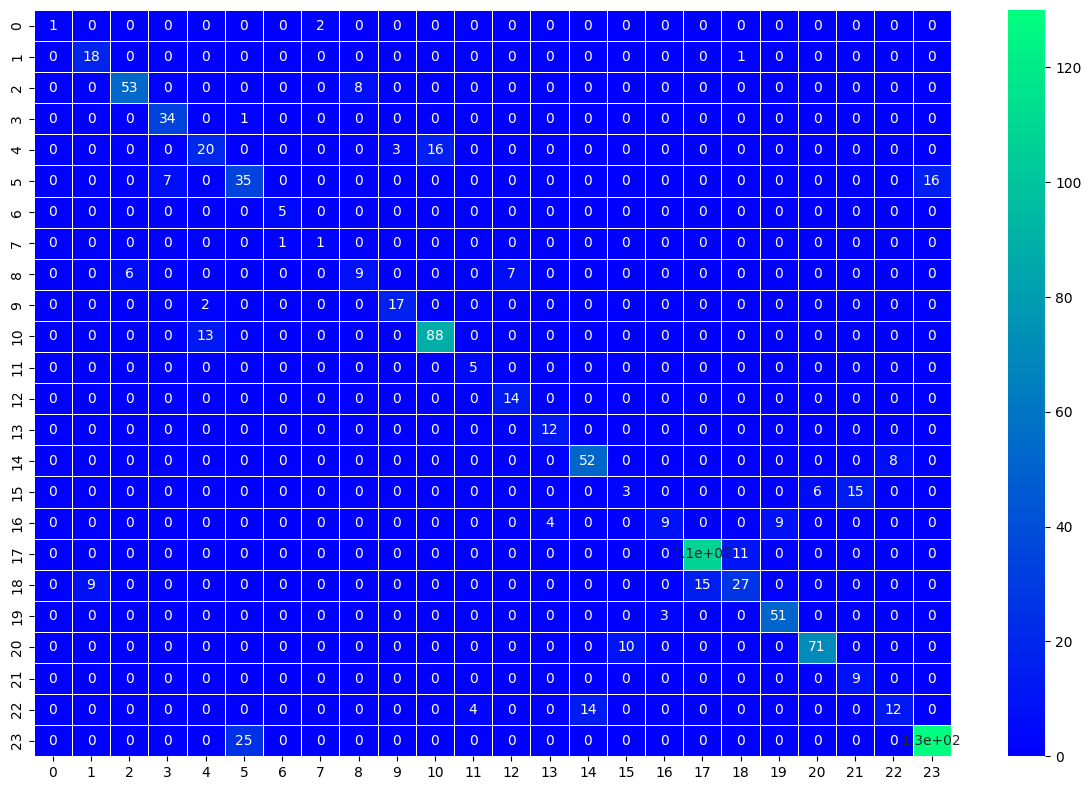

In [7]:
y_pred = model.predict(X_test)
confuse = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(confuse, annot=True, cmap="winter", linecolor="white", linewidths=.5, ax=ax)
plt.tight_layout()
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      0.95      0.78        19
           2       0.90      0.87      0.88        61
           3       0.83      0.97      0.89        35
           4       0.57      0.51      0.54        39
           5       0.57      0.60      0.59        58
           6       0.83      1.00      0.91         5
           7       0.33      0.50      0.40         2
           8       0.53      0.41      0.46        22
           9       0.85      0.89      0.87        19
          10       0.85      0.87      0.86       101
          11       0.56      1.00      0.71         5
          12       0.67      1.00      0.80        14
          13       0.75      1.00      0.86        12
          14       0.79      0.87      0.83        60
          15       0.23      0.12      0.16        24
          16       0.75      0.41      0.53        22
          17       0.88    

In [9]:
accuracy = accuracy_score(y_test, y_pred)
presisi = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")
print(
    f"""
    Accuracy : {accuracy:.3f}
    Precision_Score : {presisi:.3f}
    Recall_Score : {recall:.3f}
    F1_Score : {f1:.3f}
    """
)


    Accuracy : 0.784
    Precision_Score : 0.784
    Recall_Score : 0.784
    F1_Score : 0.784
    


In [13]:
test = X_test.iloc[-1:]
test

,level_training_process,number_of_participants,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,interest_in_discount_program,training_total_meetings,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,training_type,training_name,trainer_name
1926,0.75,0.368421,0.75,0.714286,0.5,0.75,0.75,0.727273,1,1,0,2,2,1,1,6,14,7


In [14]:
model.predict(test)

array([20])

In [19]:
predict_proba = model.predict_proba(test)[0]
for i, j in enumerate(predict_proba):
    print(i, j)

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 9.055648361626704e-08
16 0.0
17 0.0
18 0.0
19 0.0
20 0.9999999094435156
21 0.0
22 0.0
23 0.0
